## Importing

In [101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline


## General information about data

In [102]:
sns.set(style="darkgrid")

In [103]:
data=pd.read_csv('Surgical-deepnet.csv')

In [104]:
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [106]:
data.shape

(14635, 25)

In [107]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
bmi,14635.0,31.295642,8.152709,2.150000,26.510000,28.980000,35.295000,92.590000
Age,14635.0,63.205268,18.088191,6.100000,51.500000,59.700000,74.700000,90.000000
asa_status,14635.0,0.632320,0.539952,0.000000,0.000000,1.000000,1.000000,2.000000
baseline_cancer,14635.0,0.262316,0.439909,0.000000,0.000000,0.000000,1.000000,1.000000
baseline_charlson,14635.0,0.977520,1.758355,0.000000,0.000000,0.000000,2.000000,13.000000
baseline_cvd,14635.0,0.620294,0.485330,0.000000,0.000000,1.000000,1.000000,1.000000
baseline_dementia,14635.0,0.004851,0.069485,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_diabetes,14635.0,0.120875,0.325993,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_digestive,14635.0,0.189546,0.391955,0.000000,0.000000,0.000000,0.000000,1.000000
baseline_osteoart,14635.0,0.342740,0.474642,0.000000,0.000000,0.000000,1.000000,1.000000


In [108]:
data.isnull().sum()

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [109]:
data.corr()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
bmi,1.000000,-0.131775,0.198517,-0.027676,0.054377,0.165106,-0.024774,0.276938,0.138284,0.031200,...,-0.138256,0.064263,-0.172120,0.047607,-0.046647,0.062073,-0.005362,-0.008283,-0.158021,-0.142174
Age,-0.131775,1.000000,0.464704,-0.097013,-0.077871,0.534403,0.025245,-0.047026,-0.126093,0.599267,...,-0.365726,-0.378483,0.396119,-0.153218,0.252315,-0.373015,0.006337,-0.472597,0.098534,-0.111327
asa_status,0.198517,0.464704,1.000000,-0.031495,0.130995,0.428380,0.049368,0.166710,0.028396,0.288574,...,-0.110116,-0.184197,0.190633,-0.030694,0.113079,-0.169813,0.065111,-0.144174,-0.010930,-0.005030
baseline_cancer,-0.027676,-0.097013,-0.031495,1.000000,0.607025,-0.065392,0.012017,0.048585,0.026289,-0.337672,...,0.280105,0.156281,-0.022222,0.066409,-0.087130,0.148956,0.029138,0.332292,-0.001588,0.165639
baseline_charlson,0.054377,-0.077871,0.130995,0.607025,1.000000,0.014420,0.029417,0.272373,0.074498,-0.277666,...,0.326956,0.138473,-0.057433,0.080301,-0.080774,0.140055,0.076886,0.355927,-0.051101,0.185514
baseline_cvd,0.165106,0.534403,0.428380,-0.065392,0.014420,1.000000,0.003970,0.158813,-0.002405,0.363864,...,-0.332444,-0.205884,0.226689,-0.083604,0.135849,-0.193553,0.000051,-0.323526,-0.023040,-0.090748
baseline_dementia,-0.024774,0.025245,0.049368,0.012017,0.029417,0.003970,1.000000,0.022378,-0.003658,-0.017269,...,0.060437,0.022263,-0.009824,0.018829,-0.035513,0.016739,-0.004404,0.060250,-0.019633,0.047781
baseline_diabetes,0.276938,-0.047026,0.166710,0.048585,0.272373,0.158813,0.022378,1.000000,0.101449,-0.100828,...,-0.017999,0.087231,-0.080030,0.032067,-0.054824,0.089584,-0.003372,0.070804,-0.068685,0.015916
baseline_digestive,0.138284,-0.126093,0.028396,0.026289,0.074498,-0.002405,-0.003658,0.101449,1.000000,-0.117452,...,0.033600,0.136223,-0.142109,0.058300,-0.084934,0.111229,0.011117,0.115694,-0.014116,0.051219
baseline_osteoart,0.031200,0.599267,0.288574,-0.337672,-0.277666,0.363864,-0.017269,-0.100828,-0.117452,1.000000,...,-0.587628,-0.368019,0.304294,-0.191824,0.229134,-0.350420,-0.029511,-0.735616,0.060440,-0.279056


## Data analysis and visualazation

In [110]:
binary=[]##spreate the binary and continous values to analys it
continious=[]
for k in data.columns:
    if data[k].nunique()==2:
        binary.append(k)
    else:
        continious.append(k)

In [111]:
binary.remove('complication')

In [112]:
binary

['baseline_cancer',
 'baseline_cvd',
 'baseline_dementia',
 'baseline_diabetes',
 'baseline_digestive',
 'baseline_osteoart',
 'baseline_psych',
 'baseline_pulmonary',
 'gender',
 'mort30']

In [113]:
s=data.corr()['complication']##the correlation between the target and features
s

bmi                   -0.142174
Age                   -0.111327
asa_status            -0.005030
baseline_cancer        0.165639
baseline_charlson      0.185514
baseline_cvd          -0.090748
baseline_dementia      0.047781
baseline_diabetes      0.015916
baseline_digestive     0.051219
baseline_osteoart     -0.279056
baseline_psych        -0.003476
baseline_pulmonary     0.032236
ahrq_ccs               0.141858
ccsComplicationRate    0.390923
ccsMort30Rate          0.276823
complication_rsi       0.373834
dow                    0.162355
gender                -0.064637
hour                   0.071588
month                 -0.098057
moonphase              0.161883
mort30                 0.056041
mortality_rsi          0.356086
race                   0.012198
complication           1.000000
Name: complication, dtype: float64

<AxesSubplot:ylabel='complication'>

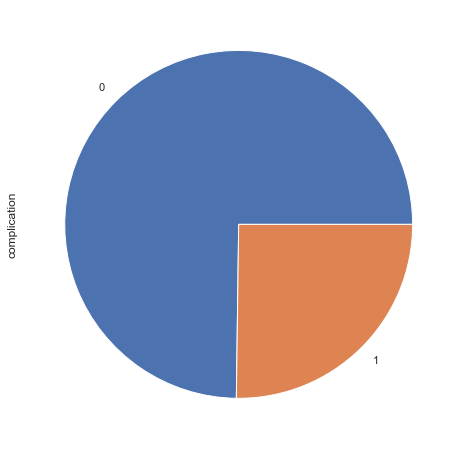

In [114]:
plt.figure(figsize=(20,8))
data['complication'].value_counts().plot.pie()

In [115]:
def mn(data,cols,target='complication'):##function to show the mean value between target and every binary feature...
    for col in cols:
        print(col)
        print(data.groupby(target)[col].mean())
        print("*********************************")

In [116]:
mn(data,g)

baseline_cancer
complication
0    0.220009
1    0.387805
Name: baseline_cancer, dtype: float64
*********************************
baseline_cvd
complication
0    0.645866
1    0.544444
Name: baseline_cvd, dtype: float64
*********************************
baseline_dementia
complication
0    0.002924
1    0.010569
Name: baseline_dementia, dtype: float64
*********************************
baseline_diabetes
complication
0    0.117862
1    0.129810
Name: baseline_diabetes, dtype: float64
*********************************
baseline_digestive
complication
0    0.177889
1    0.224119
Name: baseline_digestive, dtype: float64
*********************************
baseline_osteoart
complication
0    0.419644
1    0.114634
Name: baseline_osteoart, dtype: float64
*********************************
baseline_psych
complication
0    0.082960
1    0.080759
Name: baseline_psych, dtype: float64
*********************************
baseline_pulmonary
complication
0    0.088625
1    0.110298
Name: baseline_pulmonary, d

In [117]:
a=s[binary]

In [118]:
def plts(data,cols,target='complication'):##function to plot count plot for binary features with showing the corr with target feature
    for col in cols:
        plt.figure(figsize=(20,9))
        k=str(a[col])
        plt.title(col+"   corrlation ps:    "+str(a[col]))
        sns.countplot(data[col])
    

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

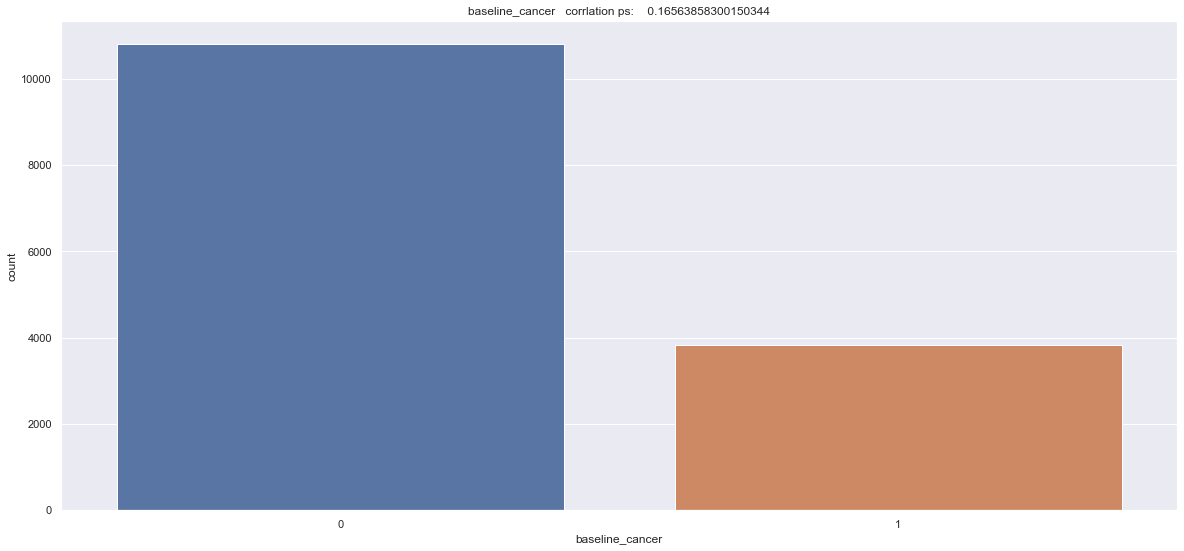

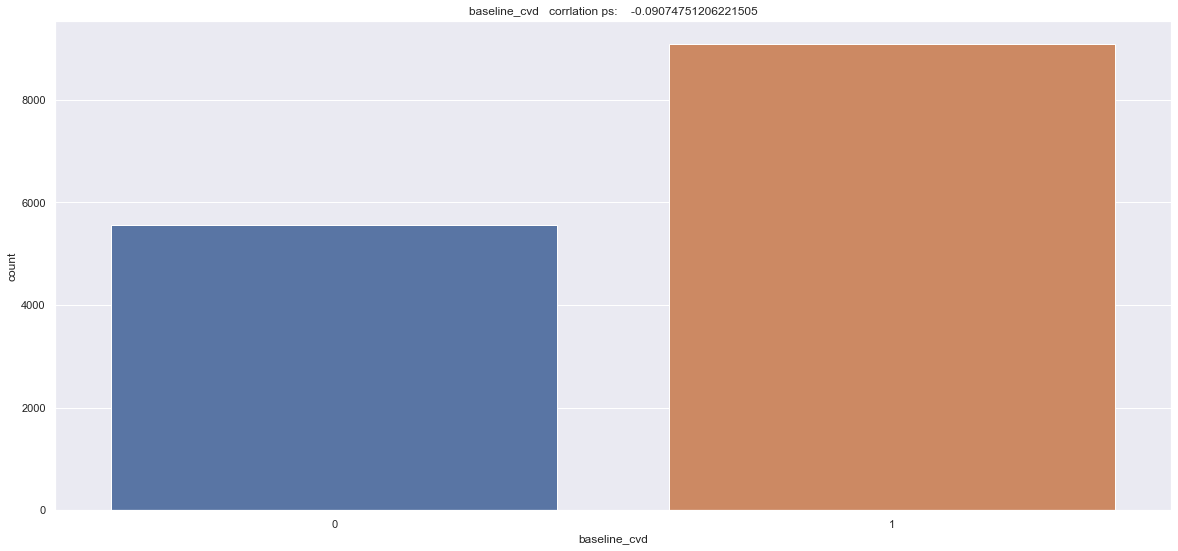

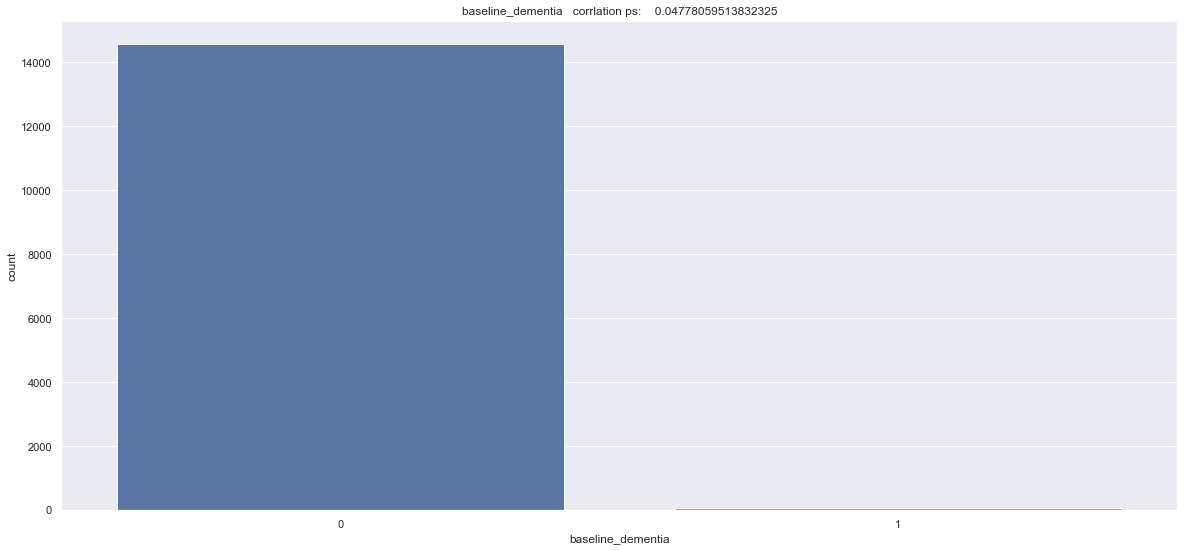

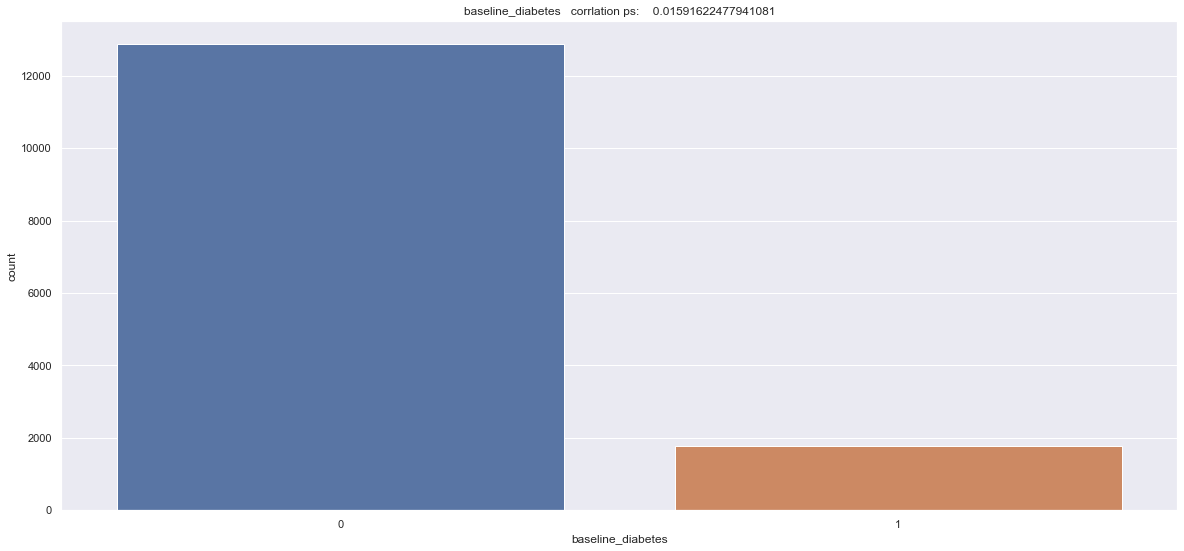

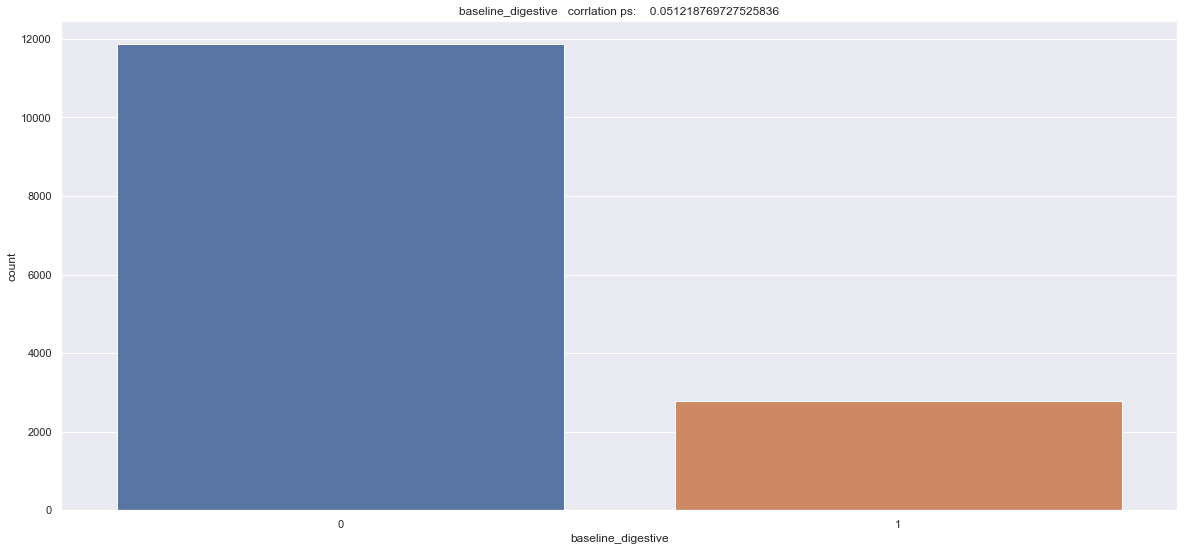

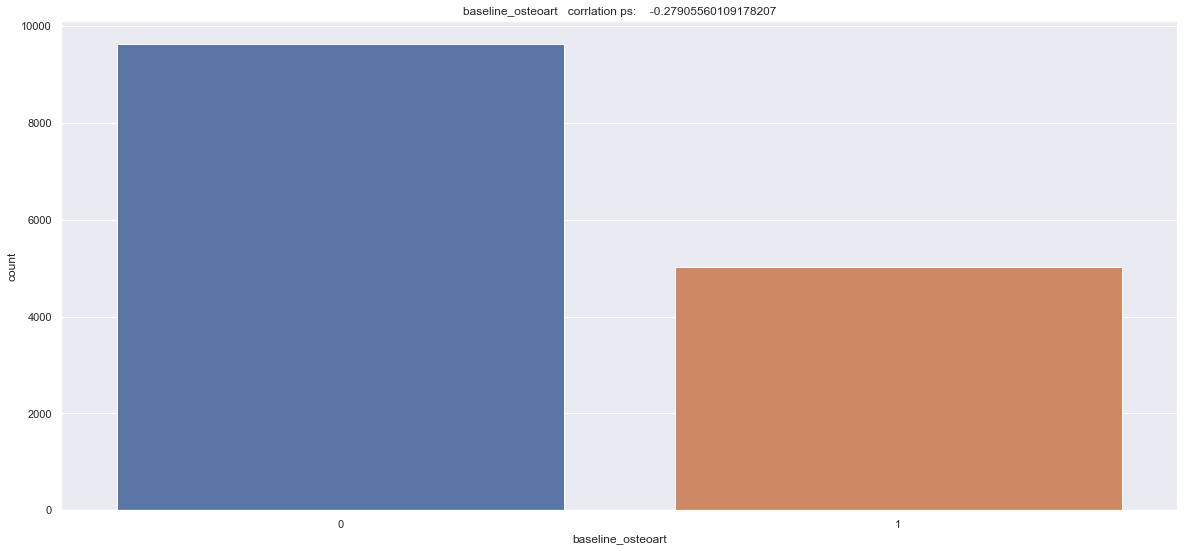

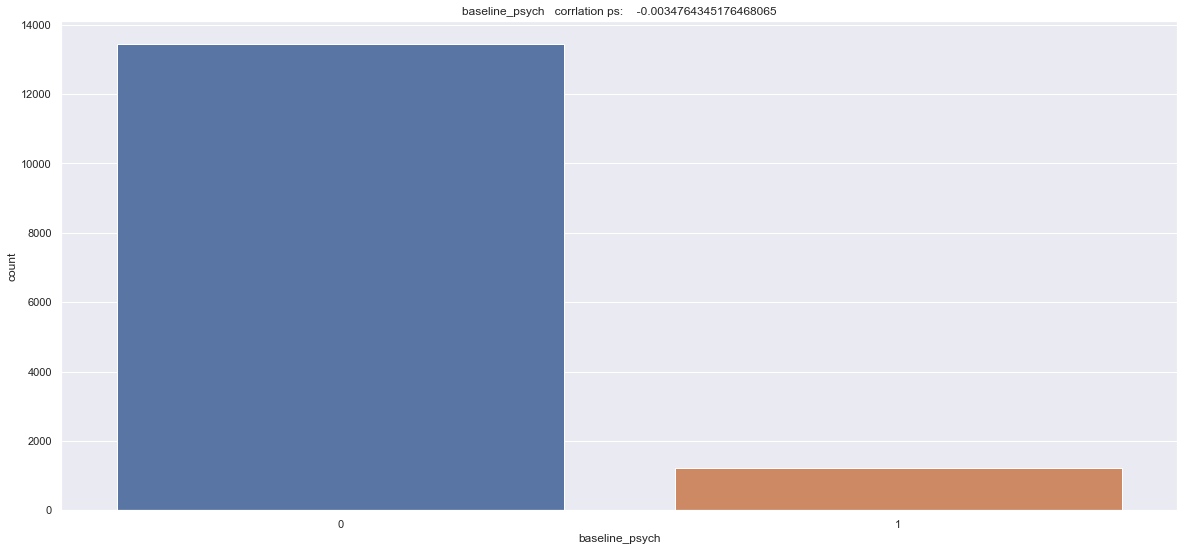

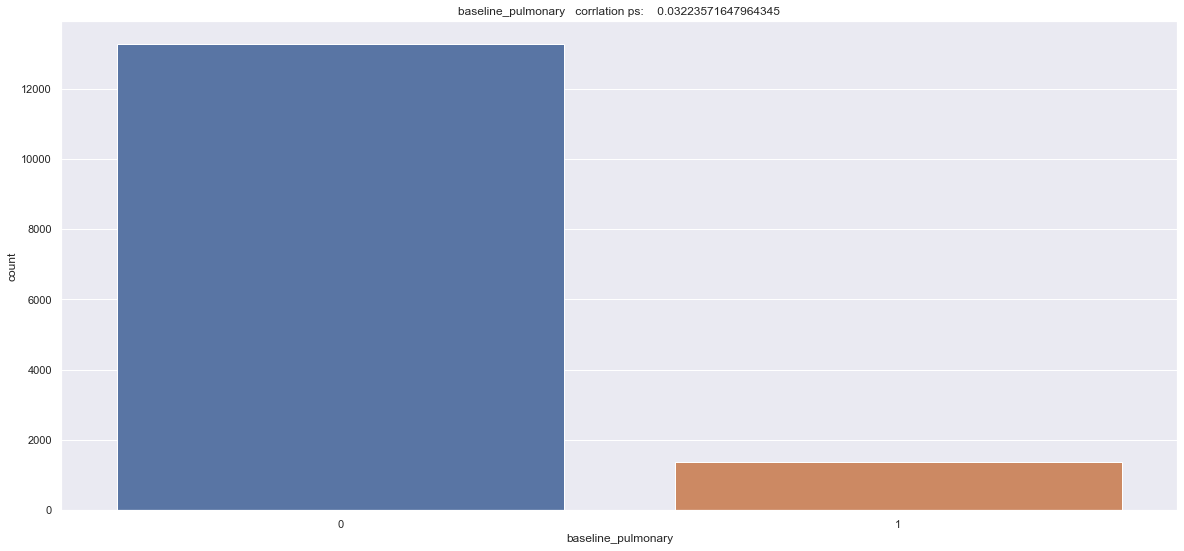

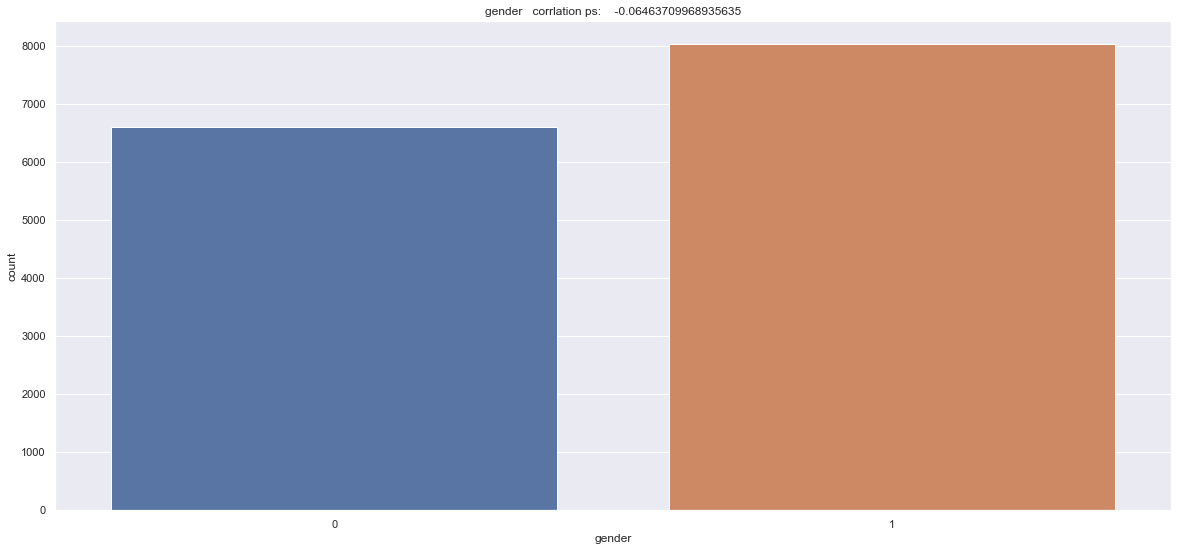

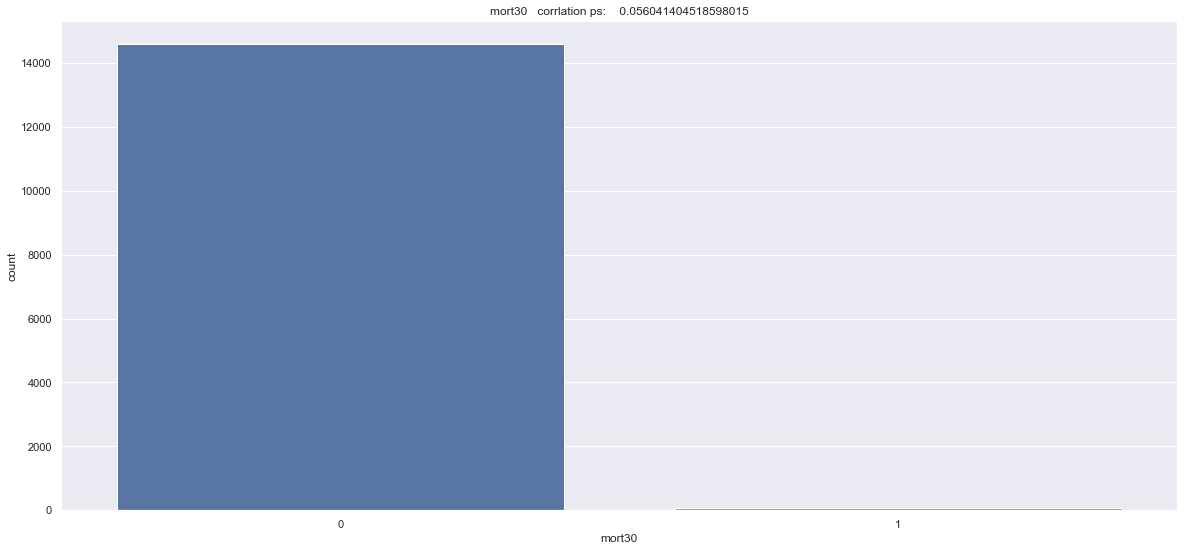

In [119]:
plts(data,binary)

In [120]:
v=[data.columns]

In [121]:
continious##continous feature

['bmi',
 'Age',
 'asa_status',
 'baseline_charlson',
 'ahrq_ccs',
 'ccsComplicationRate',
 'ccsMort30Rate',
 'complication_rsi',
 'dow',
 'hour',
 'month',
 'moonphase',
 'mortality_rsi',
 'race']

In [122]:
def fd(data,col,target='complication'):##function to plot different plots for continous features
    plt.figure(figsize=(20,4))
    plt.subplot(1,4,1)
    plt.title("dist")
    sns.distplot(data[col],bins=30,color = 'r')
 

    plt.subplot(1,4,2)
    plt.title("col")
    sns.boxplot(y=data[col],color = 'g')


    plt.subplot(1,4,3)
    plt.title("col")
    sns.scatterplot(data[target],data[col],color = 'b')
    
    
    plt.subplot(1,4,4)
    plt.title("col")
    sns.barplot(data[target],data[col],color='y') 

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result

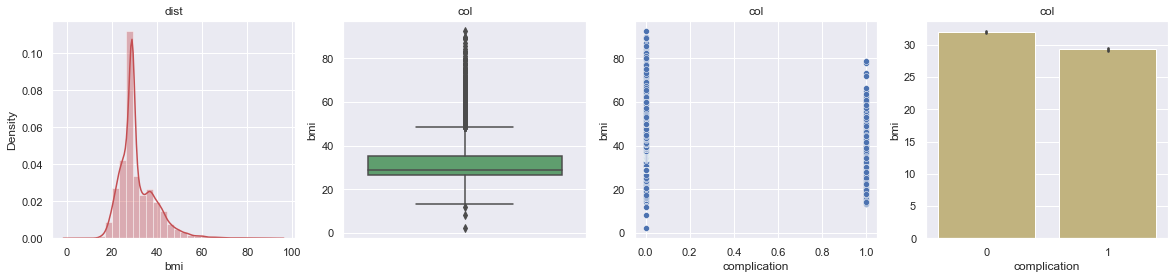

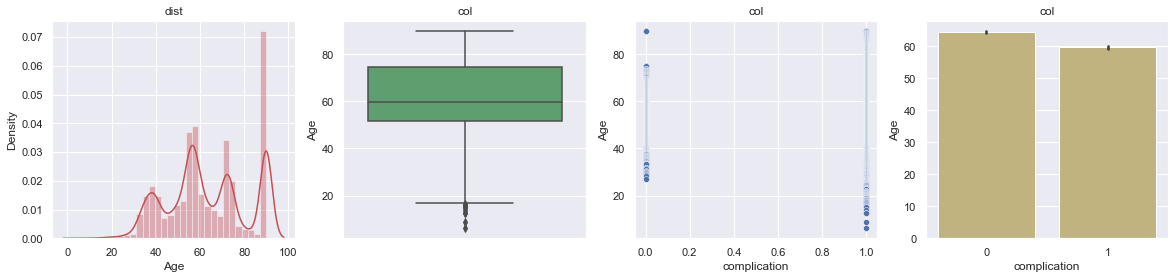

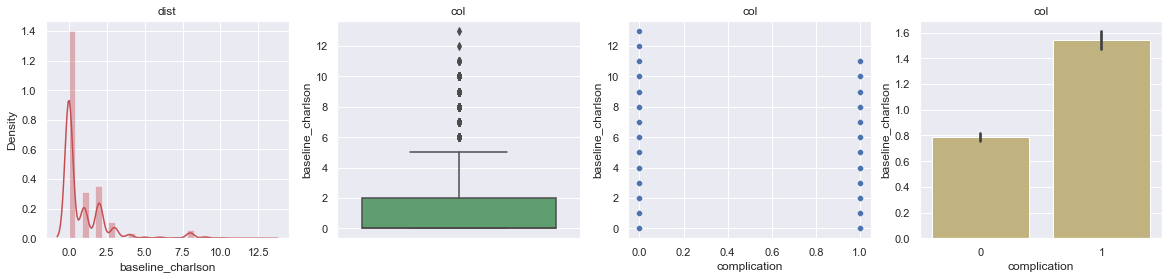

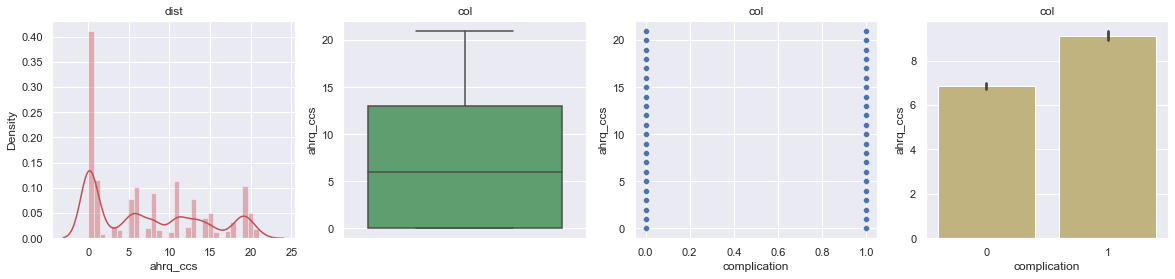

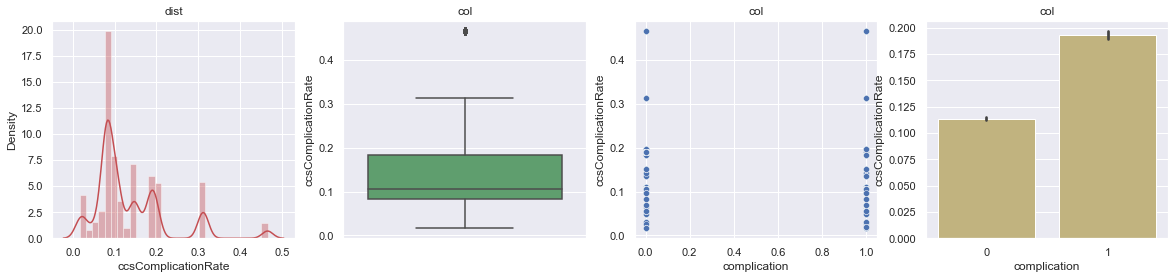

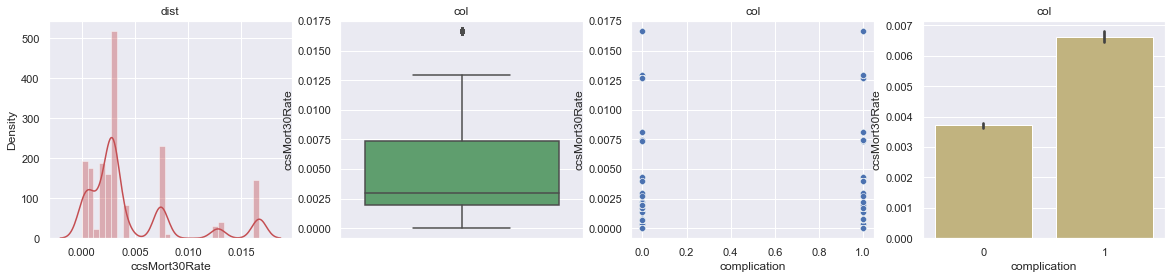

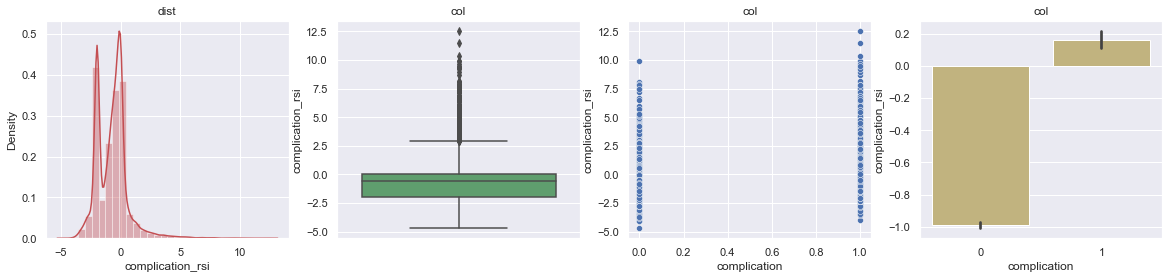

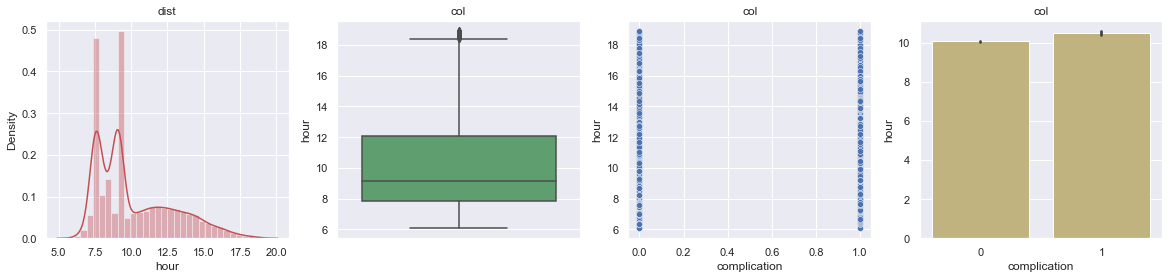

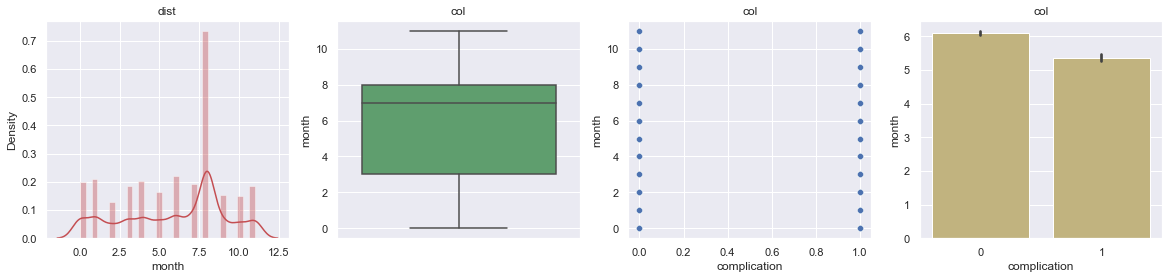

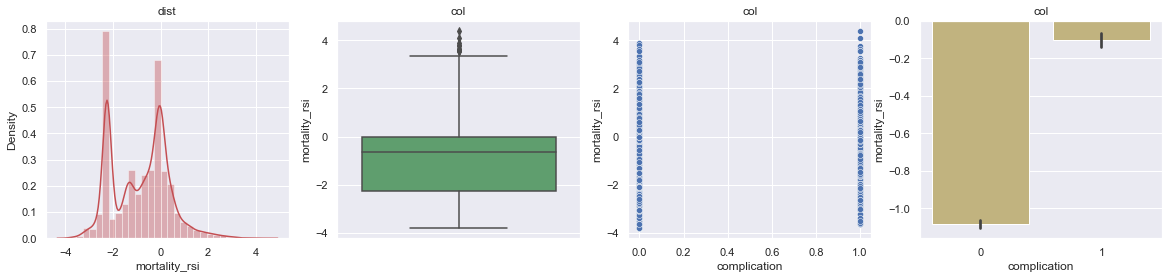

In [123]:
for i in p:
    fd(data,i)


<AxesSubplot:>

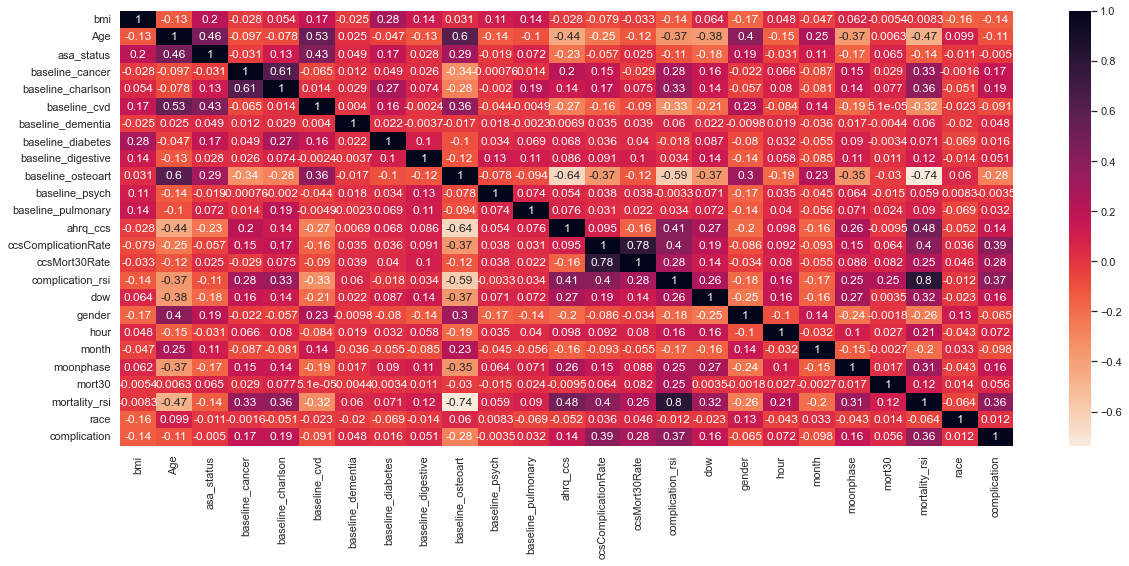

In [124]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap="rocket_r")

In [125]:
data.head()

,bmi,Age,asa_status,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,...,complication_rsi,dow,gender,hour,month,moonphase,mort30,mortality_rsi,race,complication
0,19.31,59.2,1,1,0,0,0,0,0,0,...,-0.57,3,0,7.63,6,1,0,-0.43,1,0
1,18.73,59.1,0,0,0,0,0,0,0,0,...,0.21,0,0,12.93,0,1,0,-0.41,1,0
2,21.85,59.0,0,0,0,0,0,0,0,0,...,0.00,2,0,7.68,5,3,0,0.08,1,0
3,18.49,59.0,1,0,1,0,0,1,1,0,...,-0.65,2,1,7.58,4,3,0,-0.32,1,0
4,19.70,59.0,1,0,0,0,0,0,0,0,...,0.00,0,0,7.88,11,0,0,0.00,1,0


<AxesSubplot:xlabel='complication', ylabel='bmi'>

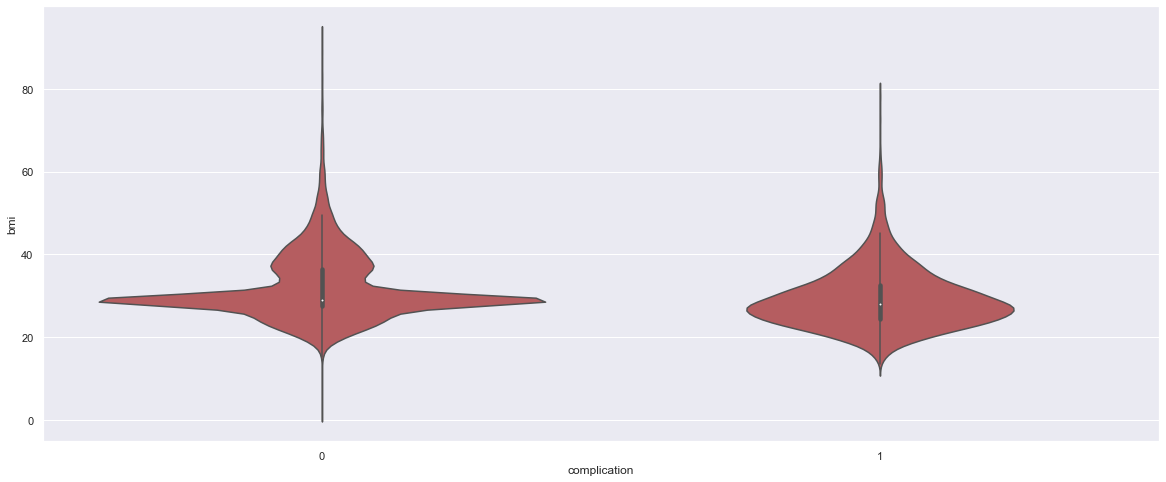

In [126]:
plt.figure(figsize=(20,8))
sns.violinplot(data=data,x='complication',y='bmi',color="r")

<AxesSubplot:xlabel='complication', ylabel='Age'>

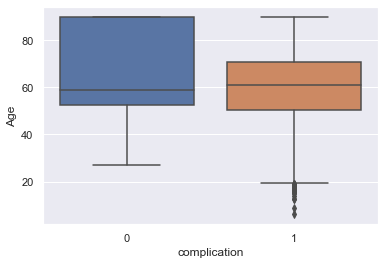

In [127]:
sns.boxplot(data=data,x='complication',y='Age')

<AxesSubplot:xlabel='Age', ylabel='bmi'>

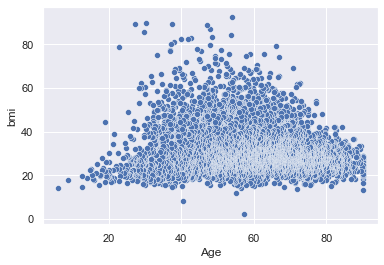

In [128]:
sns.scatterplot(data=data,x='Age',y='bmi')

In [129]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [130]:
encd=[]
for i in data.columns:
    if (data[i].nunique()<12 and data[i].nunique()>2):
        encd.append(i)

In [131]:
encd

['asa_status', 'dow', 'moonphase', 'race']

In [132]:
data["race"].value_counts()

1    12594
0     1610
2      431
Name: race, dtype: int64

In [133]:
data=pd.get_dummies(data=data,columns=encd,drop_first=True)

In [134]:
data.columns

Index(['bmi', 'Age', 'baseline_cancer', 'baseline_charlson', 'baseline_cvd',
       'baseline_dementia', 'baseline_diabetes', 'baseline_digestive',
       'baseline_osteoart', 'baseline_psych', 'baseline_pulmonary', 'ahrq_ccs',
       'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'gender',
       'hour', 'month', 'mort30', 'mortality_rsi', 'complication',
       'asa_status_1', 'asa_status_2', 'dow_1', 'dow_2', 'dow_3', 'dow_4',
       'moonphase_1', 'moonphase_2', 'moonphase_3', 'race_1', 'race_2'],
      dtype='object')

## Data spliting

In [135]:
x=data.drop("complication",axis=1)
y=data["complication"]

In [136]:
from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

## model

In [138]:
dct = DecisionTreeClassifier(random_state = 42)
xgb = XGBClassifier()
rf = RandomForestClassifier(random_state = 42)

In [139]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [140]:
xgb.fit(X_train,y_train)

C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\envs\panda_ground\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[21:21:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [141]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [142]:
dp=dct.predict(X_test)
rp=rf.predict(X_test)
xp=xgb.predict(X_test)

In [144]:
print("accuracy for xgb:"+str(accuracy_score(y_test, xp)))
print("accuracy for randomforest:"+str(accuracy_score(y_test, rp)))
print("accuracy for decition tree:"+str(accuracy_score(y_test, dp)))

accuracy for xgb:0.9077553809361121
accuracy for randomforest:0.8616330714041681
accuracy for decition tree:0.8619747181414418


In [146]:
print(classification_report(y_test, xp))
print("------------------------------------")
print(classification_report(y_test, rp))
print("------------------------------------")
print(classification_report(y_test, dp))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2207
           1       0.88      0.72      0.79       720

    accuracy                           0.91      2927
   macro avg       0.90      0.84      0.87      2927
weighted avg       0.91      0.91      0.90      2927

------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2207
           1       0.80      0.58      0.67       720

    accuracy                           0.86      2927
   macro avg       0.84      0.77      0.79      2927
weighted avg       0.86      0.86      0.85      2927

------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      2207
           1       0.70      0.76      0.73       720

    accuracy                           0.86      2927
   macro avg       0.81      0.83      0.82      2927


In [148]:
print(str(confusion_matrix(y_test, xp)))
print("------------------------------------")
print(str(confusion_matrix(y_test, rp)))
print("------------------------------------")
print(str(confusion_matrix(y_test, dp)))

[[2139   68]
 [ 202  518]]
------------------------------------
[[2106  101]
 [ 304  416]]
------------------------------------
[[1974  233]
 [ 171  549]]


In [149]:
data.iloc[detect_outliers(data,p)]##the detected out lier///it will not efect the classification 

,bmi,Age,baseline_cancer,baseline_charlson,baseline_cvd,baseline_dementia,baseline_diabetes,baseline_digestive,baseline_osteoart,baseline_psych,...,asa_status_2,dow_1,dow_2,dow_3,dow_4,moonphase_1,moonphase_2,moonphase_3,race_1,race_2
8605,56.17,62.9,1,8,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8909,49.19,60.1,1,7,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
9182,49.92,58.1,1,7,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
9439,51.66,56.4,1,8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
10528,52.85,46.7,1,9,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
11862,50.32,70.8,1,9,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
12128,48.56,67.6,1,6,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
12950,52.05,59.4,0,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13029,52.58,58.6,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
11,23.46,58.8,1,8,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

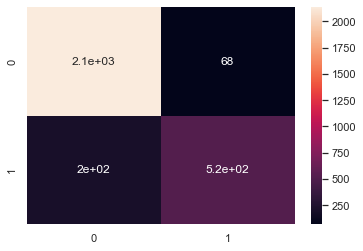

In [151]:
sns.heatmap(confusion_matrix(y_test, xp),annot=True)